In [1]:
! pip install tiktoken
! pip install matplotlib
! pip install wordcloud
! pip install pandas
! pip install nltk

  Using cached urllib3-2.5.0-py3-none-any.whl.metadata (6.5 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 994.0/994.0 kB 31.3 MB/s eta 0:00:00
Using cached urllib3-2.5.0-py3-none-any.whl (129 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5/5 [tiktoken]

[notice] A new release of pip is available: 25.1.1 -> 25.3
[notice] To update, run: pip install --upgrade pip
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.1/8.1 MB 34.2 MB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.8/2.8 MB 49.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.1/5.1 MB 45.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.7/4.7 MB 43.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8/8 [matplotlib]8 [matplotlib]

[notice] A new release of pip is available: 25.1.1 -> 25.3
[notice] To update, run: pip install --upgrade pip

[notice] A new release of pip is available: 25.1.1 -> 25.3
[notice] To update, run: pip install --upgrade pip
  Using cached pyt

In [ ]:
import pandas as pd

df = pd.read_csv('../prompts.csv')


,act,prompt,for_devs
count,220,220,220
unique,216,220,2
top,Chess Player,Imagine you are an experienced Ethereum develo...,False
freq,2,1,167


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 220 entries, 0 to 219
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   act       220 non-null    object
 1   prompt    220 non-null    object
 2   for_devs  220 non-null    bool  
dtypes: bool(1), object(2)
memory usage: 3.8+ KB


In [7]:
act_count = df['act'].value_counts()
for_dev_count = df['for_devs'].value_counts()
print(act_count)
print(for_dev_count)

act
Chess Player                2
Life Coach                  2
Python Interpreter          2
Prompt Generator            2
Ethereum Developer          1
                           ..
Journal Reviewer            1
DIY Expert                  1
Social Media Influencer     1
Socrat                      1
Explainer with Analogies    1
Name: count, Length: 216, dtype: int64
for_devs
False    167
True      53
Name: count, dtype: int64


In [18]:
len(df["act"])


220

In [19]:
len(df["act"].unique())

216

In [20]:
df.drop_duplicates(inplace=True)

In [21]:
null_values = df.isnull().sum()
print(null_values)

act         0
prompt      0
for_devs    0
dtype: int64


In [33]:
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from collections import Counter


In [42]:
nltk.download('punkt')
nltk.download('punkt_tab')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to
[nltk_data]     /Users/mandipdhakal/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to
[nltk_data]     /Users/mandipdhakal/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/mandipdhakal/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [43]:
target_df = df[df['for_devs'] == True]

In [44]:
target_words = [
    word.lower()
    for prompt in target_df['prompt']
    for word in word_tokenize(prompt)
    if word.isalnum() and word.lower() not in stopwords.words('english')
]

target_word_counts = Counter(target_words)
print(target_word_counts)

Counter({'want': 63, 'act': 48, 'provide': 43, 'code': 39, 'first': 39, 'write': 29, 'reply': 27, 'explanations': 23, 'include': 19, 'need': 18, 'text': 18, 'use': 18, 'output': 17, 'like': 17, 'data': 15, 'software': 15, 'request': 14, 'commands': 13, 'give': 13, 'inside': 12, 'language': 12, 'type': 11, 'nothing': 11, 'help': 11, 'project': 11, 'prompt': 11, 'input': 11, 'terminal': 10, 'one': 10, 'else': 10, 'command': 10, 'table': 10, 'system': 10, 'example': 10, 'create': 10, 'developer': 9, 'block': 9, 'app': 9, 'ask': 9, 'expert': 9, 'tell': 8, 'something': 8, 'curly': 8, 'new': 8, 'information': 8, 'list': 8, 'problem': 8, 'examples': 8, 'ensure': 7, 'unless': 7, 'based': 7, 'column': 7, 'details': 7, 'job': 7, 'come': 7, 'could': 7, 'specific': 7, 'company': 7, 'related': 7, 'explain': 7, 'concepts': 7, 'model': 7, 'solutions': 7, 'bullet': 7, 'test': 7, 'make': 7, 'creating': 6, 'message': 6, 'including': 6, 'please': 6, 'relevant': 6, 'understanding': 6, 'show': 6, 'unique':

In [45]:
word_cloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(target_word_counts)

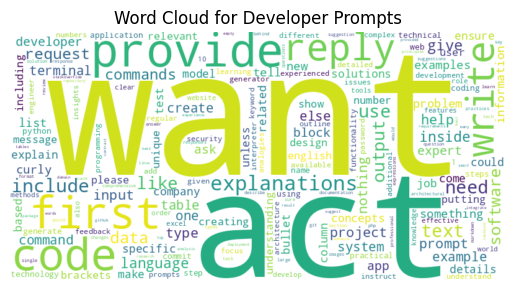

In [46]:
plt.imshow(word_cloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud for Developer Prompts')
plt.show()